In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from matplotlib import gridspec
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from scipy.stats.mstats import ttest_ind
from cartopy.util import add_cyclic_point

In [2]:
def group_year(data0, nyear):
    nmonth = 12
    data = np.zeros((nyear, nmonth, data0.shape[1], data0.shape[2]))
    for i in range(nyear):
        for j in range(nmonth):
            data[i, j, :, :] = data0[int(j*nyear+i), :, :]
    return data
plt.rcParams['font.family'] = 'Times New Roman'
# cmapzj = plt.get_cmap('RdBu_r')
# normzj = mpl.colors.BoundaryNorm(np.arange(-0.4, 0.41, 0.05), cmapzj.N)
# normzj = mpl.colors.Normalize(vmin=-0.4, vmax=0.4)
# im1 = mpl.cm.ScalarMappable(norm=normzj, cmap=cmapzj)
# c1 = ax.contourf(cycle_lon, cycle_lat, cycle_tsa_diff, norm=normzj, cmap=cmapzj, transform=ccrs.PlateCarree(), levels=np.arange(-0.4, 0.41, 0.05))

In [3]:
data_fix1960_exp1 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_fix_exp1_clm2.h0_TSA.nc')
data_fix1960_exp2 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_fix_exp2_clm2.h0_TSA.nc')
data_fix1960_exp3 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_fix_exp3_clm2.h0_TSA.nc')

data_fix2009_exp1 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_fix2009_exp1_clm2.h0_TSA.nc')
data_fix2009_exp2 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_fix2009_exp2_clm2.h0_TSA.nc')
data_fix2009_exp3 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_fix2009_exp3_clm2.h0_TSA.nc')

data_dyn_exp1 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_dyn_exp1_clm2.h0_TSA.nc')
data_dyn_exp2 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_dyn_exp2_clm2.h0_TSA.nc')
data_dyn_exp3 = xr.open_dataset('/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/data/1960-2009_monmean_FC5_LUCC_dyn_exp3_clm2.h0_TSA.nc')

tsa_fix1960 = (data_fix1960_exp1['TSA'] + data_fix1960_exp2['TSA'] + data_fix1960_exp3['TSA'])/3.
tsa_fix2009 = (data_fix2009_exp1['TSA'] + data_fix2009_exp2['TSA'] + data_fix2009_exp3['TSA'])/3.
tsa_dyn = (data_dyn_exp1['TSA'] + data_dyn_exp2['TSA'] + data_dyn_exp3['TSA'])/3.

tsa_diff_2009_1960 = tsa_fix2009.mean('time') - tsa_fix1960.mean('time')
tsa_diff_dyn_1960 = tsa_dyn.mean('time') - tsa_fix1960.mean('time')
tsa_diff_dyn_2009 = tsa_dyn.mean('time') - tsa_fix2009.mean('time')

tsa_fix1960_year_month = group_year(tsa_fix1960, 50)
tsa_fix2009_year_month = group_year(tsa_fix2009, 50)
tsa_dyn_year_month = group_year(tsa_dyn, 50)

tsa_fix1960_year = np.mean(tsa_fix1960_year_month, axis=1)
tsa_fix2009_year = np.mean(tsa_fix2009_year_month, axis=1)
tsa_dyn_year = np.mean(tsa_dyn_year_month, axis=1)

_, pp_fix2009_fix1960 = ttest_ind(tsa_fix1960_year, tsa_fix2009_year, axis=0, equal_var=False)
_, pp_fix1960_dyn = ttest_ind(tsa_dyn_year, tsa_fix1960_year, axis=0, equal_var=False)
_, pp_fix2009_dyn = ttest_ind(tsa_dyn_year, tsa_fix2009_year, axis=0, equal_var=False)

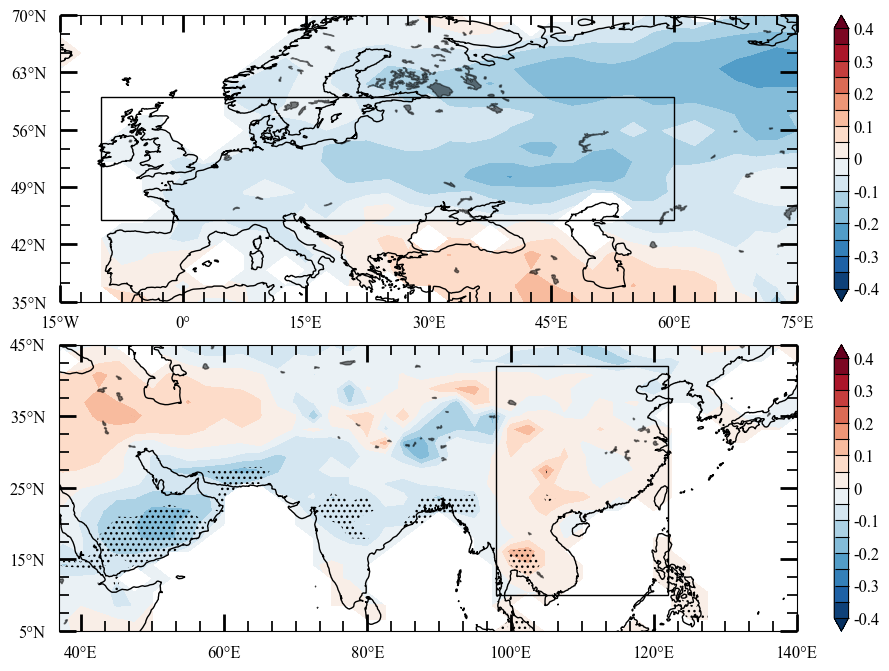

In [4]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1)
gs.update(wspace=0.26, hspace=0.15)
lonmin, lonmax = -15., 75.
latmin, latmax = 35., 70.
lon, lat = data_fix1960_exp1.lon, data_fix1960_exp1.lat
cycle_tsa_diff_dyn_1960, cycle_lon = add_cyclic_point(tsa_diff_dyn_1960, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
ax2 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax2.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c2 = ax2.contourf(cycle_lon, cycle_lat, cycle_tsa_diff_dyn_1960, transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=np.arange(-0.4, 0.41, 0.05), extend='both')
cbar2 = fig.colorbar(c2, shrink=1, pad=0.04)
cbar2.ax.tick_params(direction='in', length=10, labelsize='large')
tick_locs = np.arange(-0.4, 0.41, 0.05)
tick_labels = ['-0.4','','-0.3','','-0.2','','-0.1','','0','','0.1','','0.2','','0.3','','0.4']
cbar2.locator = mpl.ticker.FixedLocator(tick_locs)
cbar2.formatter = mpl.ticker.FixedFormatter(tick_labels)
c2p = ax2.contourf(lon.values, lat.values, pp_fix1960_dyn, [0, 0.05], hatches=['...'], colors="none", transform=ccrs.PlateCarree())
ax2.add_feature(cfeat.COASTLINE)
ax2.add_feature(cfeat.LAKES, color='black', alpha=0.5)
ax2.set_xticks([-15, 0, 15, 30, 45, 60, 75], crs=ccrs.PlateCarree())
ax2.set_yticks([35, 42, 49, 56, 63, 70], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis="both", which='major', width=2, length=12, direction='in', right=True, top=True, pad=10)
ax2.tick_params(axis="both", which='minor', width=1.25, length=7, direction='in', right=True, top=True)
ax2.tick_params(tick2On=True, label2On=False)
ax2.xaxis.set_minor_locator(MultipleLocator(15/6.))
ax2.yaxis.set_minor_locator(MultipleLocator(7/3.))
ax2.tick_params(axis='both', labelsize='large')
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1, zorder = 5,transform=ccrs.PlateCarree())
ax2.add_patch(rect1)



lonmin, lonmax = 37, 140
latmin, latmax = 5., 45.
ax3 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax3.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c3 = ax3.contourf(cycle_lon, cycle_lat, cycle_tsa_diff_dyn_1960, transform=ccrs.PlateCarree(), cmap='RdBu_r',levels=np.arange(-0.4, 0.41, 0.05), extend='both')
cbar3 = fig.colorbar(c3, shrink=1, pad=0.04)
cbar3.ax.tick_params(direction='in', length=10, labelsize='large')
tick_locs = np.arange(-0.4, 0.41, 0.05)
tick_labels = ['-0.4','','-0.3','','-0.2','','-0.1','','0','','0.1','','0.2','','0.3','','0.4']
cbar3.locator = mpl.ticker.FixedLocator(tick_locs)
cbar3.formatter = mpl.ticker.FixedFormatter(tick_labels)
c3p = ax3.contourf(lon.values, lat.values, pp_fix1960_dyn, [0, 0.05], hatches=['...'], colors="none", transform=ccrs.PlateCarree())
ax3.add_feature(cfeat.COASTLINE)
ax3.add_feature(cfeat.LAKES, color='black', alpha=0.5)
ax3.set_xticks([40, 60, 80, 100, 120, 140], crs=ccrs.PlateCarree())
ax3.set_yticks([5, 15, 25, 35, 45], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.tick_params(axis="both", which='major', width=2, length=12, direction='in', right=True, top=True, pad=10)
ax3.tick_params(axis="both", which='minor', width=1.25, length=7, direction='in', right=True, top=True)
ax3.tick_params(tick2On=True, label2On=False)
ax3.xaxis.set_minor_locator(MultipleLocator(20/6.))
ax3.yaxis.set_minor_locator(MultipleLocator(2.5))
ax3.tick_params(axis='both', labelsize='large')
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1, zorder = 5,transform=ccrs.PlateCarree())
ax3.add_patch(rect2)
# plt.savefig(f'/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/picture/dyn_1960_tsa_eu_ea_50.png', bbox_inches='tight')

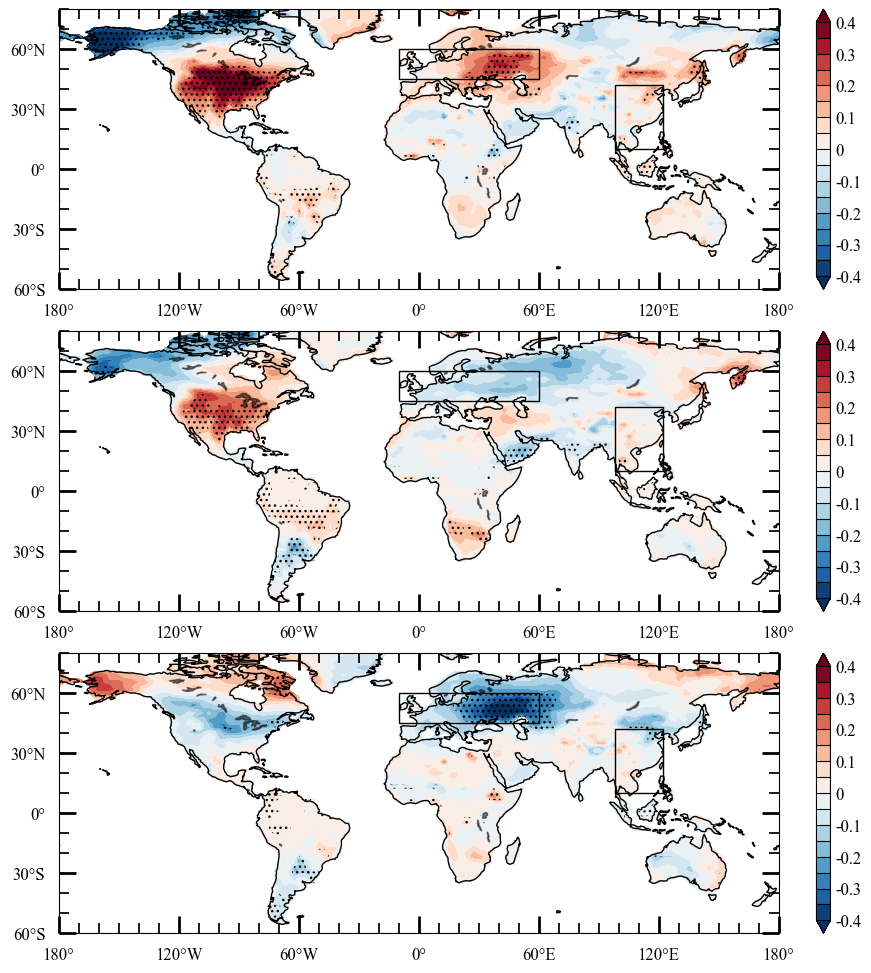

In [6]:
lonmin, lonmax = 0, 357.5
latmin, latmax = -60., 80.
lon, lat = data_fix1960_exp1.lon, data_fix1960_exp1.lat
cycle_tsa_diff_2009_1960, cycle_lon = add_cyclic_point(tsa_diff_2009_1960, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 1)
gs.update(wspace=0.26, hspace=0.15)
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c1 = ax.contourf(cycle_lon, cycle_lat, cycle_tsa_diff_2009_1960, transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=np.arange(-0.4, 0.41, 0.05), extend='both')
cbar = fig.colorbar(c1, shrink=1, pad=0.04)
cbar.ax.tick_params(direction='in', length=10, labelsize='large')
tick_locs = np.arange(-0.4, 0.41, 0.05)
tick_labels = ['-0.4','','-0.3','','-0.2','','-0.1','','0','','0.1','','0.2','','0.3','','0.4']
cbar.locator = mpl.ticker.FixedLocator(tick_locs)
cbar.formatter = mpl.ticker.FixedFormatter(tick_labels)
c1p = ax.contourf(lon.values, lat.values, pp_fix2009_fix1960, [0, 0.05], hatches=['...'], colors="none", transform=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAKES, color='black', alpha=0.5)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-60, -30, 0, 30, 60], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis="both", which='major', width=2, length=12, direction='in', right=True, top=True, pad=10)
ax.tick_params(axis="both", which='minor', width=1.25, length=7, direction='in', right=True, top=True)
ax.tick_params(tick2On=True, label2On=False)
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.tick_params(axis='both', labelsize='large')
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1, zorder = 5,transform=ccrs.PlateCarree())
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1, zorder = 5,transform=ccrs.PlateCarree())
ax.add_patch(rect1)
ax.add_patch(rect2)



cycle_tsa_diff_dyn_1960, cycle_lon = add_cyclic_point(tsa_diff_dyn_1960, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax2.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c2 = ax2.contourf(cycle_lon, cycle_lat, cycle_tsa_diff_dyn_1960, transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=np.arange(-0.4, 0.41, 0.05), extend='both')
cbar2 = fig.colorbar(c2, shrink=1, pad=0.04)
cbar2.ax.tick_params(direction='in', length=10, labelsize='large')
tick_locs = np.arange(-0.4, 0.41, 0.05)
tick_labels = ['-0.4','','-0.3','','-0.2','','-0.1','','0','','0.1','','0.2','','0.3','','0.4']
cbar2.locator = mpl.ticker.FixedLocator(tick_locs)
cbar2.formatter = mpl.ticker.FixedFormatter(tick_labels)
c2p = ax2.contourf(lon.values, lat.values, pp_fix1960_dyn, [0, 0.05], hatches=['...'], colors="none", transform=ccrs.PlateCarree())
ax2.add_feature(cfeat.COASTLINE)
ax2.add_feature(cfeat.LAKES, color='black', alpha=0.5)
ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax2.set_yticks([-60, -30, 0, 30, 60], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis="both", which='major', width=2, length=12, direction='in', right=True, top=True, pad=10)
ax2.tick_params(axis="both", which='minor', width=1.25, length=7, direction='in', right=True, top=True)
ax2.tick_params(tick2On=True, label2On=False)
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.yaxis.set_minor_locator(MultipleLocator(10))
ax2.tick_params(axis='both', labelsize='large')
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1, zorder = 5,transform=ccrs.PlateCarree())
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1, zorder = 5,transform=ccrs.PlateCarree())
ax2.add_patch(rect1)
ax2.add_patch(rect2)



cycle_tsa_diff_dyn_2009, cycle_lon = add_cyclic_point(tsa_diff_dyn_2009, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
ax3 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax3.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c3 = ax3.contourf(cycle_lon, cycle_lat, cycle_tsa_diff_dyn_2009, transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=np.arange(-0.4, 0.41, 0.05), extend='both')
cbar3 = fig.colorbar(c3, shrink=1, pad=0.04)
cbar3.ax.tick_params(direction='in', length=10, labelsize='large')
tick_locs = np.arange(-0.4, 0.41, 0.05)
tick_labels = ['-0.4','','-0.3','','-0.2','','-0.1','','0','','0.1','','0.2','','0.3','','0.4']
cbar3.locator = mpl.ticker.FixedLocator(tick_locs)
cbar3.formatter = mpl.ticker.FixedFormatter(tick_labels)
c3p = ax3.contourf(lon.values, lat.values, pp_fix2009_dyn, [0, 0.05], hatches=['...'], colors="none", transform=ccrs.PlateCarree())
ax3.add_feature(cfeat.COASTLINE)
ax3.add_feature(cfeat.LAKES, color='black', alpha=0.5)
ax3.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax3.set_yticks([-60, -30, 0, 30, 60], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.tick_params(axis="both", which='major', width=2, length=12, direction='in', right=True, top=True, pad=10)
ax3.tick_params(axis="both", which='minor', width=1.25, length=7, direction='in', right=True, top=True)
ax3.tick_params(tick2On=True, label2On=False)
ax3.xaxis.set_minor_locator(MultipleLocator(10))
ax3.yaxis.set_minor_locator(MultipleLocator(10))
ax3.tick_params(axis='both', labelsize='large')
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1, zorder = 5,transform=ccrs.PlateCarree())
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1, zorder = 5,transform=ccrs.PlateCarree())
ax3.add_patch(rect1)
ax3.add_patch(rect2)
# plt.savefig(f'/home/Fujian/hwjstu/Students/Chenhongwei/LUCC_exp/tsa_practice/picture/3typediff_tsa_50.png', bbox_inches='tight')